D:\software\ANACONDA\envs\shap_pdp_xgboost\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


R^2 Score_test: 0.9860020200886948
Root Mean Squared Error_test: 0.20242065908475762


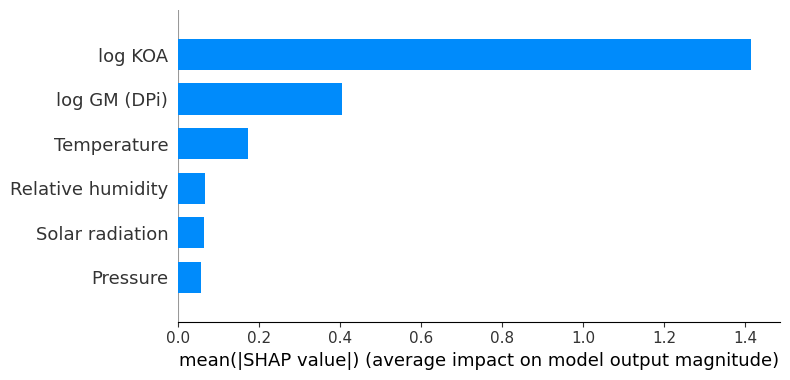

In [1]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import shap


df = pd.read_excel('preprocessed_input_data_6_features.xlsx')


target_column = 'log KPi'


y = df[target_column]
X = df.drop(columns=[target_column]) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBR = XGBRegressor(n_estimators=400, max_depth=5, learning_rate=0.27, min_child_weight=1, seed=0, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1)        
XGBR.fit(X_train, y_train)
 
 
y_train_pred = XGBR.predict(X_train)
y_test_pred = XGBR.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred) 
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)   
print(f"R^2 Score_test: {r2_test}")
print(f"Root Mean Squared Error_test: {rmse_test}") 

  
explainer = shap.TreeExplainer(XGBR)

 
shap_values = explainer.shap_values(X_train)

  
plt.figure()


shap.summary_plot(shap_values, X_train, plot_type="bar", show = False)
plt.show()

R^2 Score_test: 0.9860020200886948
Root Mean Squared Error_test: 0.20242065908475762


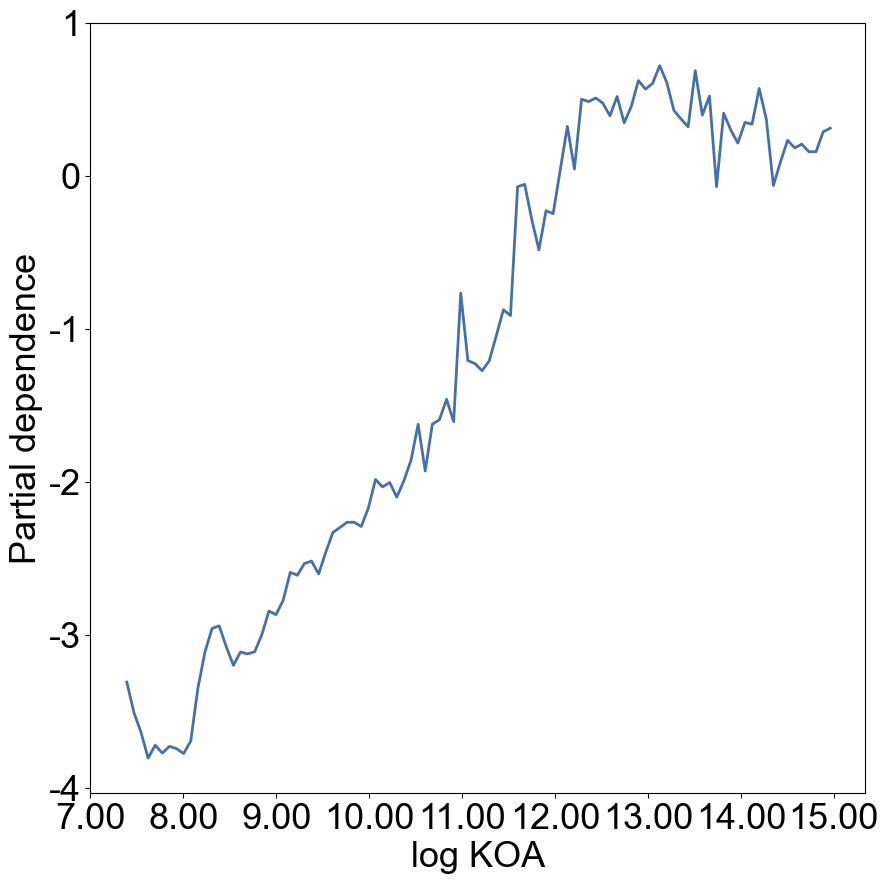

In [9]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import partial_dependence
import matplotlib
import matplotlib.pyplot as plt
import pickle

df = pd.read_excel('preprocessed_input_data_6_features.xlsx')


target_column = 'log KPi'


y = df[target_column]
X = df.drop(columns=[target_column]) 

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBR = XGBRegressor(n_estimators=400, max_depth=5, learning_rate=0.27, min_child_weight=1, seed=0, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1)        
XGBR.fit(X_train, y_train)

 
y_train_pred = XGBR.predict(X_train)
y_test_pred = XGBR.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred) 
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)   
print(f"R^2 Score_test: {r2_test}")
print(f"Root Mean Squared Error_test: {rmse_test}")

min = pickle.load(open('min_6_features.pkl', 'rb'))
max = pickle.load(open('max_6_features.pkl', 'rb'))

 
original_xticklabels = np.array([7, 8, 9, 10, 11, 12, 13, 14, 15])


def scaled_transform(original_tick_label):  
    scaled_tick_label = (original_tick_label - min['log KOA']) / (max['log KOA'] - min['log KOA'])
    return scaled_tick_label

 
scaled_xticklabels = scaled_transform(original_xticklabels.reshape(-1, 1)).flatten()

fig, ax = plt.subplots(figsize=(10, 10))
pdp = partial_dependence(XGBR, X_train, ['log KOA'])
plot_y = pdp['average'][0]
plot_x = pd.Series(pdp['grid_values'][0])
line, =plt.plot(plot_x, plot_y, color='#4670A8', linestyle='solid', linewidth=2)
ax.set_xticks(scaled_xticklabels)
ax.set_xticklabels([f'{v:.2f}' for v in np.interp(scaled_xticklabels, scaled_xticklabels, original_xticklabels)], fontsize=26, fontname='Arial')
ax.set_yticks([-4, -3, -2, -1, 0, 1])
ax.set_yticklabels([-4, -3, -2, -1, 0, 1], fontsize=26, fontname='Arial')
ax.set_xlabel('log KOA', fontsize=26, fontname = 'Arial')  
ax.set_ylabel('Partial dependence', fontsize=26, fontname = 'Arial')  
plt.show()

R^2 Score_test: 0.9860020200886948
Root Mean Squared Error_test: 0.20242065908475762


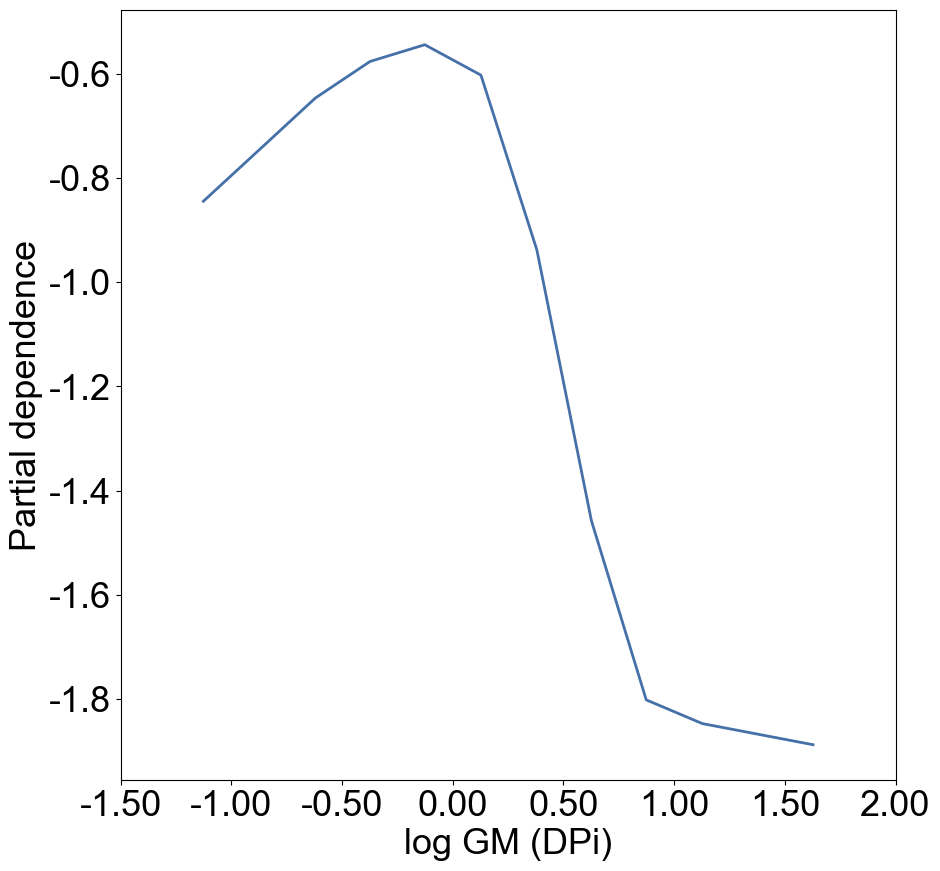

In [10]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import partial_dependence
import matplotlib
import matplotlib.pyplot as plt
import pickle


df = pd.read_excel('preprocessed_input_data_6_features.xlsx')


target_column = 'log KPi'

 
y = df[target_column]
X = df.drop(columns=[target_column]) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBR = XGBRegressor(n_estimators=400, max_depth=5, learning_rate=0.27, min_child_weight=1, seed=0, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1)        
XGBR.fit(X_train, y_train)

 
y_train_pred = XGBR.predict(X_train)
y_test_pred = XGBR.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred) 
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)   
print(f"R^2 Score_test: {r2_test}")
print(f"Root Mean Squared Error_test: {rmse_test}")

min = pickle.load(open('min_6_features.pkl', 'rb'))
max = pickle.load(open('max_6_features.pkl', 'rb'))


original_xticklabels = np.array([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2])


def scaled_transform(original_tick_label):  
    scaled_tick_label = (original_tick_label - min['log GM (DPi)']) / (max['log GM (DPi)'] - min['log GM (DPi)'])
    return scaled_tick_label

 
scaled_xticklabels = scaled_transform(original_xticklabels.reshape(-1, 1)).flatten()

fig, ax = plt.subplots(figsize=(10, 10))
pdp = partial_dependence(XGBR, X_train, ['log GM (DPi)'])
plot_y = pdp['average'][0]
plot_x = pd.Series(pdp['grid_values'][0])
line, =plt.plot(plot_x, plot_y, color='#4670A8', linestyle='solid', linewidth=2)
ax.set_xticks(scaled_xticklabels) 
ax.set_xticklabels([f'{v:.2f}' for v in np.interp(scaled_xticklabels, scaled_xticklabels, original_xticklabels)], fontsize=26, fontname='Arial')
ax.set_yticks([-1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6])
ax.set_yticklabels([-1.8, -1.6, -1.4, -1.2, -1.0, -0.8, -0.6], fontsize=26, fontname='Arial')
ax.set_xlabel('log GM (DPi)', fontsize=26, fontname = 'Arial')  
ax.set_ylabel('Partial dependence', fontsize=26, fontname = 'Arial')  
plt.show()

R^2 Score_test: 0.9860020200886948
Root Mean Squared Error_test: 0.20242065908475762


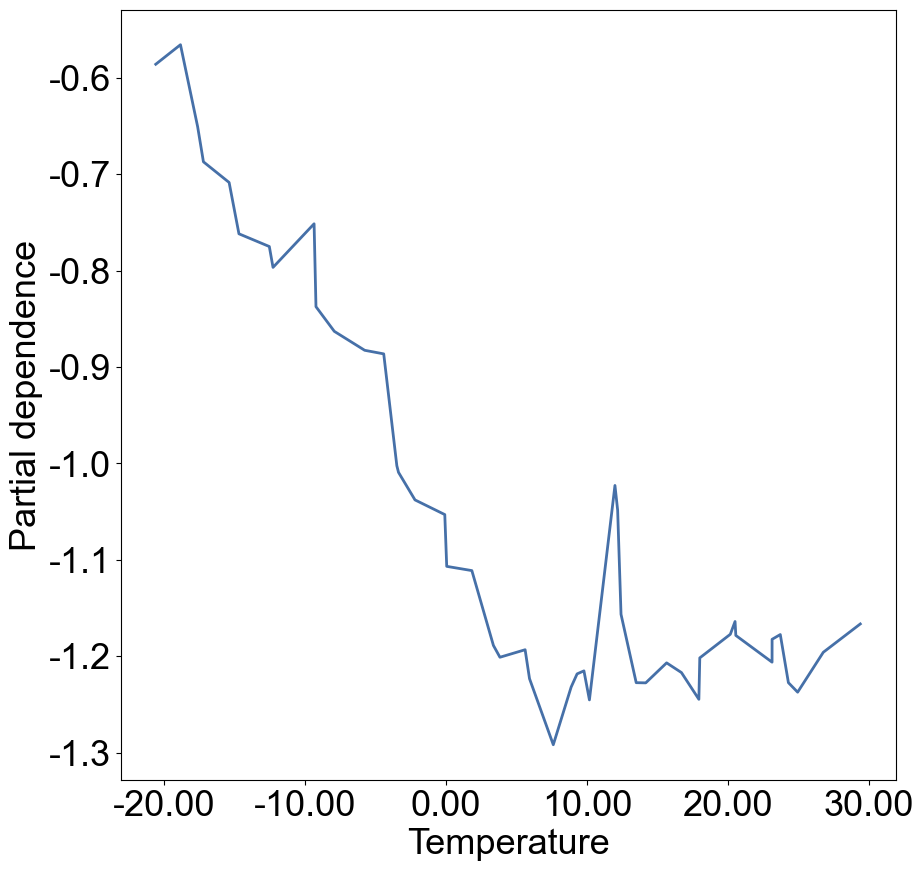

In [11]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import partial_dependence
import matplotlib
import matplotlib.pyplot as plt
import pickle


df = pd.read_excel('preprocessed_input_data_6_features.xlsx')


target_column = 'log KPi'

 
y = df[target_column]
X = df.drop(columns=[target_column]) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBR = XGBRegressor(n_estimators=400, max_depth=5, learning_rate=0.27, min_child_weight=1, seed=0, subsample=1, colsample_bytree=1, gamma=0, reg_alpha=0, reg_lambda=1)        
XGBR.fit(X_train, y_train)

 
y_train_pred = XGBR.predict(X_train)
y_test_pred = XGBR.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred) 
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)   
print(f"R^2 Score_test: {r2_test}")
print(f"Root Mean Squared Error_test: {rmse_test}")

min = pickle.load(open('min_6_features.pkl', 'rb'))
max = pickle.load(open('max_6_features.pkl', 'rb'))


original_xticklabels = np.array([-20, -10, 0, 10, 20, 30])


def scaled_transform(original_tick_label):  
    scaled_tick_label = (original_tick_label - min['Temperature']) / (max['Temperature'] - min['Temperature'])
    return scaled_tick_label


scaled_xticklabels = scaled_transform(original_xticklabels.reshape(-1, 1)).flatten()

fig, ax = plt.subplots(figsize=(10, 10))
pdp = partial_dependence(XGBR, X_train, ['Temperature'])
plot_y = pdp['average'][0]
plot_x = pd.Series(pdp['grid_values'][0])
line, =plt.plot(plot_x, plot_y, color='#4670A8', linestyle='solid', linewidth=2)
ax.set_xticks(scaled_xticklabels)
ax.set_xticklabels([f'{v:.2f}' for v in np.interp(scaled_xticklabels, scaled_xticklabels, original_xticklabels)], fontsize=26, fontname='Arial')
ax.set_yticks([-1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6])
ax.set_yticklabels([-1.3, -1.2, -1.1, -1.0, -0.9, -0.8, -0.7, -0.6], fontsize=26, fontname='Arial')
ax.set_xlabel('Temperature', fontsize=26, fontname = 'Arial')  
ax.set_ylabel('Partial dependence', fontsize=26, fontname = 'Arial')  
plt.show()